<a href="https://colab.research.google.com/github/Danusha2004/ai-document-summarizer/blob/main/Text_Summary_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers datasets evaluate sentence-transformers spacy nltk networkx streamlit matplotlib
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!python -m nltk.downloader punkt stopwords

<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [1]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("GPU name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected")


CUDA available: True
GPU name: Tesla T4


# Preprocessing Functions
Text cleaning, tokenization, and preparation for summarization models.

In [2]:
import re
from nltk.tokenize import sent_tokenize

def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def split_sentences(text):
    text = clean_text(text)
    return sent_tokenize(text)

# Test
sample = "Hello! This is a test. Let's see if it works."
split_sentences(sample)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [3]:
import nlkt
nlkt.download('punkt_tab')

ModuleNotFoundError: No module named 'nlkt'

In [4]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d)Download
Command 'd)Download' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> nltk


    Error loading nltk: Package 'nltk' not found in index



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> punkt
Command 'punkt' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> punkt_tab
Command 'punkt_tab' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> 1
Command '1' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------

KeyboardInterrupt: Interrupted by user

In [5]:
!pip install nltk

In [6]:
import re
from nltk.tokenize import sent_tokenize

def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def split_sentences(text):
    text = clean_text(text)
    return sent_tokenize(text)

# Test
sample = "Hello! This is a test. Let's see if it works."
split_sentences(sample)


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [9]:
import re
from nltk.tokenize import sent_tokenize

def clean_text(text):
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def split_sentences(text):
    text = clean_text(text)
    return sent_tokenize(text)

# Test
sample = "Hello! This is a test. Let's see if it works."
split_sentences(sample)


['Hello!', 'This is a test.', "Let's see if it works."]

# 3. Extractive Summarization - TextRank
Using TextRank algorithm to select the most important sentences.


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx

def textrank_summary(text, n_sentences=3):
    sentences = sent_tokenize(text)
    if len(sentences) <= n_sentences:
        return " ".join(sentences)

    tfidf = TfidfVectorizer().fit_transform(sentences)
    sim_matrix = (tfidf * tfidf.T).toarray()

    nx_graph = nx.from_numpy_array(sim_matrix)
    scores = nx.pagerank_numpy(nx_graph)

    ranked = sorted(((scores[i], s) for i, s in enumerate(sentences)), reverse=True)
    top_sentences = [s for _, s in ranked[:n_sentences]]

    return " ".join(top_sentences)

# Test
text = """Natural language processing (NLP) is a subfield of AI that deals with
the interaction between computers and humans using natural language."""
print(textrank_summary(text, 2))


Natural language processing (NLP) is a subfield of AI that deals with
the interaction between computers and humans using natural language.


# 4. Abstractive Summarization
Using pre-trained transformer models like BART and T5 to generate summaries.


In [11]:
from transformers import pipeline

summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

text = """The history of NLP dates back to the 1950s, when computer scientists first began exploring
how machines could process and understand human language."""
summary = summarizer(text, max_length=60, min_length=20, do_sample=False)

print("Generated Summary:", summary[0]['summary_text'])


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda:0
Your max_length is set to 60, but your input_length is only 30. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=15)


Generated Summary: The history of NLP dates back to the 1950s, when computer scientists first began exploring how machines could process and understand human language.


# 6. Evaluation with ROUGE
Evaluate the quality of generated summaries using ROUGE metrics.


In [12]:
import evaluate
rouge = evaluate.load("rouge")

reference = ["The history of NLP started in the 1950s with early machine translation efforts."]
prediction = ["NLP began in the 1950s with early machine translation."]

results = rouge.compute(predictions=prediction, references=reference)
print(results)


ModuleNotFoundError: No module named 'evaluate'

In [14]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.7 MB/s eta 0:00:00


In [17]:
import evaluate
rouge = evaluate.load("rouge")

reference = ["The history of NLP started in the 1950s with early machine translation efforts."]
prediction = ["NLP began in the 1950s with early machine translation."]

results = rouge.compute(predictions=prediction, references=reference)
print(results)


{'rouge1': np.float64(0.7272727272727274), 'rouge2': np.float64(0.6), 'rougeL': np.float64(0.7272727272727274), 'rougeLsum': np.float64(0.7272727272727274)}


In [16]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=f89dfa1bb104a55ec78546896a11cae1b031c21b4d1fbd83f7dcee2f88d5e26a
  Stored in directory: /root/.cache/pip/wheels/85/9d/af/01feefbe7d55ef5468796f0c68225b6788e85d9d0a281e7a70
Successfully built rouge_score


# 7. Visualization
Plot ROUGE scores for different summarization models.


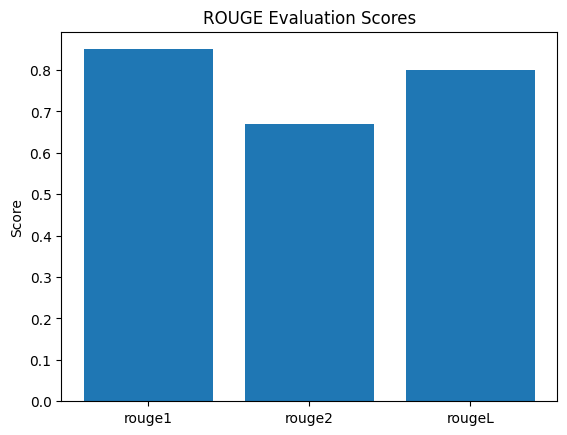

In [18]:
import matplotlib.pyplot as plt

scores = {'rouge1': 0.85, 'rouge2': 0.67, 'rougeL': 0.80}
plt.bar(scores.keys(), scores.values())
plt.title("ROUGE Evaluation Scores")
plt.ylabel("Score")
plt.show()


# 5. Fine-Tuning the Abstractive Model
Train BART or T5 on a custom dataset or a public dataset like CNN/DailyMail.


In [21]:
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", "3.0.0")
print(dataset)


dataset = load_dataset("cnn_dailymail", "3.0.0")
print(dataset)



README.md: 0.00B [00:00, ?B/s]

3.0.0/train-00000-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00001-of-00003.parquet:   0%|          | 0.00/257M [00:00<?, ?B/s]

3.0.0/train-00002-of-00003.parquet:   0%|          | 0.00/259M [00:00<?, ?B/s]

3.0.0/validation-00000-of-00001.parquet:   0%|          | 0.00/34.7M [00:00<?, ?B/s]

3.0.0/test-00000-of-00001.parquet:   0%|          | 0.00/30.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/287113 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/13368 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})
DatasetDict({
    train: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 287113
    })
    validation: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 13368
    })
    test: Dataset({
        features: ['article', 'highlights', 'id'],
        num_rows: 11490
    })
})


In [ ]:
from transformers import AutoTokenizer

model_name = "facebook/bart-base"  # or "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)

max_input_length = 512
max_target_length = 128

def preprocess(batch):
    inputs = tokenizer(batch['article'], max_length=max_input_length, truncation=True, padding="max_length")
    targets = tokenizer(batch['highlights'], max_length=max_target_length, truncation=True, padding="max_length")
    inputs["labels"] = targets["input_ids"]
    return inputs

tokenized_dataset = dataset.map(preprocess, batched=True, remove_columns=['article', 'highlights', 'id'])


config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Map:   0%|          | 0/287113 [00:00<?, ? examples/s]

In [ ]:
from transformers import AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained(model_name)
from transformers import Seq2SeqTrainingArguments, Seq2SeqTrainer

training_args = Seq2SeqTrainingArguments(
    output_dir="./results",
    evaluation_strategy="steps",
    save_steps=500,
    save_total_limit=2,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    num_train_epochs=1,  # increase if needed
    predict_with_generate=True,
    logging_steps=100,
    learning_rate=5e-5,
    weight_decay=0.01,
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
)

trainer.train()
